Lucas Derveaux, Tibo Vandercruyssen and Bavo Persyn


# Division of labor ##

We did this entire project together with pair programming.
We got together and devided smaller task and combined our findings in bigger cells regularly.
The table below shows the division of labor, but as said before, we rarely worked alone and helped each other out even when it wasn't our particular subject.

| Work                                                  | Lucas Derveaux | Bavo Persyn | Tibo Vandercruyssen |
|-------------------------------------------------------|:--------------:|:-----------:|:-------------------:|
| Preprocessing                                         | X              | X           | X                   |
| Task                                                  |                |             |                     |
| Task                                                  |                |             |                     |
| Task                                                  |                |             |                     |
| Task                                                  |                |             |                     |
| Task                                                  |                |             |                     |



# Data preprocessing

Import the right libraries

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import math
import sklearn

import warnings
warnings.filterwarnings('ignore')

data = pd.read_csv('data/listings.csv')

First of all we took the important data cleaning from the first part of this project. Not everything was relevant, this part of the project focusses on textual data. 

The bigger part of the previous data cleaning was on numerical data, which is irrelevant for the current dataset.

We started with a correct dataset, some columns were shifted by an excessive comma, these colums were found by looking for errors in "host_since", which expects a date from the format: YYYY-MM-DD. 
The reason for this excessive comma contained a comma. To avoid loosing textual data, we concatenated the original text from neighborhood_overview (before the comma) with the original and wrong placed text in picture_url (neighborhood_overview text after the comma). The following columns on that row had to be shifted to the left. The last column that was wrongfully created and only contained useless values and was dropped.

In [3]:
data_cleaned = data

shifted = data_cleaned[data_cleaned['host_since'].str.match("20[0-2][0-9]-[0-1][0-9]-[0-3][0-9]")==False]
data_cleaned = data_cleaned[data_cleaned['host_since'].str.match("20[0-2][0-9]-[0-1][0-9]-[0-3][0-9]")==True]

for row in range(0, len(shifted)):
    shifted.iloc[row,6] = shifted.iloc[row,6] + ", " + shifted.iloc[row,7]
    for col in range( 7, (len(shifted.keys())-1) ):
        shifted.iloc[row,col] = shifted.iloc[row,col+1]


data_cleaned = pd.concat([data_cleaned, shifted])

data_cleaned = data_cleaned.drop(columns=['Unnamed: 74'])

data_cleaned

,id,listing_url,scrape_id,last_scraped,name,description,neighborhood_overview,picture_url,host_id,host_url,...,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,187870,https://www.airbnb.com/rooms/187870,20210716195504,2021-07-16,Luxury studio 'Spiegelhof' in the centre of Ghent,The top floor of our house in the center of Gh...,We live in a quiet and pleasant neighborhood w...,https://a0.muscache.com/pictures/26c46224-795c...,904277,https://www.airbnb.com/users/show/904277,...,4.87,4.58,4.85,NaN,t,1,0,1,0,3.61
1,203806,https://www.airbnb.com/rooms/203806,20210716195504,2021-07-16,Flat close to Sint-Pieters Station!,This well-located and comfortable one-bedroom ...,The house is located in a dead-end street - so...,https://a0.muscache.com/pictures/fe477b7f-93ac...,999847,https://www.airbnb.com/users/show/999847,...,4.79,4.49,4.54,NaN,f,2,2,0,0,2.84
2,204245,https://www.airbnb.com/rooms/204245,20210716195504,2021-07-16,Modern studio's in Ghent centre,<b>The space</b><br />We offer luxury studio's...,NaN,https://a0.muscache.com/pictures/1766072/02965...,1003009,https://www.airbnb.com/users/show/1003009,...,4.70,4.97,4.63,NaN,f,2,2,0,0,0.29
3,216715,https://www.airbnb.com/rooms/216715,20210716195504,2021-07-16,converted loft,Please read full desription for how to get the...,It's close to all that you will want or need v...,https://a0.muscache.com/pictures/1927009/20760...,911466,https://www.airbnb.com/users/show/911466,...,4.85,4.89,4.76,NaN,t,1,1,0,0,4.31
4,252269,https://www.airbnb.com/rooms/252269,20210716195504,2021-07-16,Large & bright town House - Center Ghent - max 8p,"bright, spacious, authentic & beautifully rest...","our neighbourhood is quiet, but nicely vibrati...",https://a0.muscache.com/pictures/69675b54-3e78...,1195314,https://www.airbnb.com/users/show/1195314,...,4.97,4.98,4.72,NaN,f,1,1,0,0,2.23
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
515,35279903,https://www.airbnb.com/rooms/35279903,20210716195504,2021-07-16,"Box in a Box (Beam) - A rural gift, open it!",www.boxinabox.be ...,Village (Drongen) 2km <br />City by bike (Ghen...,https://a0.muscache.com/pictures/60412037-544b...,242219560,https://www.airbnb.com/users/show/242219560,...,5.00,4.60,4.80,NaN,t,2,2,0,0,0.51
516,35297611,https://www.airbnb.com/rooms/35297611,20210716195504,2021-07-16,"Box in a Box (Cube) - a rural gift, open it!",www.boxinabox.be ...,Village (Drongen) 2km <br />City by bike (Ghen...,https://a0.muscache.com/pictures/aeecf01e-7dfa...,242219560,https://www.airbnb.com/users/show/242219560,...,5.00,4.80,4.60,NaN,t,2,2,0,0,0.25
537,36503556,https://www.airbnb.com/rooms/36503556,20210716195504,2021-07-16,Visiting Gent! save money! many options to enjoy!,Small place with a big heart! <br />The goal o...,)<br /><br /><b>The space</b><br />The studio ...,https://a0.muscache.com/pictures/e006cafc-6a90...,274438998,https://www.airbnb.com/users/show/274438998,...,4.69,4.77,4.62,NaN,f,1,0,0,1,0.67
841,49136989,https://www.airbnb.com/rooms/49136989,20210716195504,2021-07-16,Boatie's * Bed bad boot,Aye!<br />Langs de oever van de Schelde stelle...,De woonboot ligt op de groene Scheldearm tusse...,https://a0.muscache.com/pictures/miso/Hosting-...,31377738,https://www.airbnb.com/users/show/31377738,...,5.00,5.00,5.00,NaN,t,1,0,1,0,0.48


The data in 'room_type' indicates the type of the room. There are four possibilities: Entire home/apt, Private room, Shared room or Hotel. This data wasn't a numerical value so we couldn't use that to train the model. What we could do is replace them with a number between 0 and 3, but this gives another problem where the model might assume some kind of order or hierarchy. One-hot encoding is in our opinion the better solution to this problem.
There are four new columns created which indicate the type of a listing with a number '1' in the correct column and a '0' in the three other columns.


In [4]:
a = pd.get_dummies(data_cleaned['room_type'], prefix="room_type")

frames = [data_cleaned, a]
data_cleaned = pd.concat(frames, axis=1)


data_cleaned.drop(['room_type'], inplace=True, axis=1)

data_cleaned.rename(
    columns={
        "room_type_Private room": "room_type_private", 
        "room_type_Entire home/apt": "room_type_entire", 
        "room_type_Hotel room": "room_type_hotel", 
        "room_type_Shared room": "room_type_shared"}, 
        inplace=True
    )


The price has to be a numeric value instead of a string with a dollar-sign and commas between every three numbers to group them by thousand. In this cell we fixed that problem to use the price in a numerical way.

In [5]:
data_cleaned['price']=data_cleaned['price'].str.replace(',','')
data_cleaned['price']=data_cleaned['price'].str.replace('$','')
data_cleaned["price"] = pd.to_numeric(data_cleaned["price"])

Some columns had the incorrect type to the value they represent. By converting the value to the right type, we fixed this problem. For this part of the project there is only one important column where we had to change the type.

In [6]:
data_cleaned['review_scores_rating'] = data_cleaned['review_scores_rating'].astype(float)

A first important task is to detect duplicate listings. If the same listing is multiple times in the dataset, this indicates duplicate data and that has a bad influence in our further research. Firstly we created a list with a tuple of the 'id', the 'longitude' and the 'latitude' for every listing in the dataset to find listings with the same location. We checked if there are tuples in our list with the same latitude and longitude but with a different id. If so we add this id to a set called duplicates. 

Afterwards we created a new Dataframe called data_duplicates which contains all rows with there id's are not in the duplicates set. 
For the different id's but same location in the data_duplicates set we look for the duplicate names. When these names are the same we only keep one and delete the others.

In [7]:
data_cleaned
locations = []
duplicates = set([])

for i in range(0, data_cleaned.shape[0]):
    locations.append((data_cleaned.loc[i, 'id'], data_cleaned.loc[i, 'longitude'], data_cleaned.loc[i, 'latitude']))

for i in range(0, len(locations)):
    for j in range(i, len(locations)):
        if(locations[i][1] == locations[j][1] and locations[i][2] == locations[j][2] and not locations[i][0] == locations[j][0]):
            duplicates.add(locations[j][0])


data_duplicates = data_cleaned
for i in data_cleaned['id']:
    if not i in duplicates:
        data_duplicates = data_duplicates[data_duplicates['id'] != i]

duplicates_name = {}

for i in data_duplicates['id']:
    for j in data_duplicates['id']:
        if( i != j and (data_duplicates[data_duplicates['id'] == i]['name'].iloc[0] == data_duplicates[data_duplicates['id'] == j]['name'].iloc[0])):
            if(j not in duplicates_name.keys()):
                duplicates_name[i] = j

for i in duplicates_name.keys():            
    data_duplicates.drop( data_duplicates[ data_duplicates['id'] == i ].index , inplace=True)
            
data_duplicates


,id,listing_url,scrape_id,last_scraped,name,description,neighborhood_overview,picture_url,host_id,host_url,...,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month,room_type_entire,room_type_hotel,room_type_private,room_type_shared
10,743981,https://www.airbnb.com/rooms/743981,20210716195504,2021-07-16,Black & White studioA central Ghent,This is a new self-catered studio situated in ...,This studio is situated in a hip upcoming neig...,https://a0.muscache.com/pictures/51758505/4532...,1328011,https://www.airbnb.com/users/show/1328011,...,f,4,4,0,0,0.22,1,0,0,0
15,887716,https://www.airbnb.com/rooms/887716,20210716195504,2021-07-16,Duplex studio F central Ghent,Self-catered studio on 3th floor with extra me...,This studio is situated in a hip upcoming neig...,https://a0.muscache.com/pictures/55793173/4404...,1328011,https://www.airbnb.com/users/show/1328011,...,f,4,4,0,0,0.15,1,0,0,0
39,1790941,https://www.airbnb.com/rooms/1790941,20210716195504,2021-07-16,CLEAR AND LIGHTFULL APARTMENT CENTRE OF GHENT,We offer you an apartment in the Oude Houtlei ...,The apartment is situated in the heart of the ...,https://a0.muscache.com/pictures/pro_photo_too...,4974034,https://www.airbnb.com/users/show/4974034,...,f,2,2,0,0,1.95,1,0,0,0
44,2031654,https://www.airbnb.com/rooms/2031654,20210716195504,2021-07-16,Duplex Studio near historical center Ghent,"Sunny, newly decorated studio on the 2nd floor...",Quiet neighbourhood at walking distance from h...,https://a0.muscache.com/pictures/573d540b-c36e...,10429259,https://www.airbnb.com/users/show/10429259,...,f,7,7,0,0,0.49,1,0,0,0
46,2048007,https://www.airbnb.com/rooms/2048007,20210716195504,2021-07-16,"Modern flat - 2 bed, 2 bath",This modern base floor apartment in the center...,In center of Ghent in safe school neighborhood...,https://a0.muscache.com/pictures/9ab2101b-73c1...,10429259,https://www.airbnb.com/users/show/10429259,...,f,7,7,0,0,0.49,1,0,0,0
171,12103538,https://www.airbnb.com/rooms/12103538,20210716195504,2021-07-16,Living The Dream - A Hidden Gem,"Living The Dream, een luxe loft in een geresta...",Toplocatie !<br />Living The Dream is gelegen ...,https://a0.muscache.com/pictures/4b924457-8ca3...,64426079,https://www.airbnb.com/users/show/64426079,...,t,2,2,0,0,1.44,1,0,0,0
241,17415990,https://www.airbnb.com/rooms/17415990,20210716195504,2021-07-16,Edville studio Duplex (2p-4p),Studio Edville Gent biedt verschillende studio...,Studio Edville Gent is gelegen aan het water i...,https://a0.muscache.com/pictures/c556f91d-8b55...,414263,https://www.airbnb.com/users/show/414263,...,t,8,7,0,0,0.08,1,0,0,0
242,17416223,https://www.airbnb.com/rooms/17416223,20210716195504,2021-07-16,Edville studio Duplex A304 (2p-4p),Studio Edville Gent biedt verschillende studio...,Studio Edville Gent is gelegen aan het water i...,https://a0.muscache.com/pictures/56f70957-aa6d...,414263,https://www.airbnb.com/users/show/414263,...,t,8,7,0,0,0.05,1,0,0,0
243,17416354,https://www.airbnb.com/rooms/17416354,20210716195504,2021-07-16,Edville Studio A102,Studio Edville Gent biedt verschillende studio...,Studio Edville Gent is gelegen aan het water i...,https://a0.muscache.com/pictures/2bf2e262-e6f2...,414263,https://www.airbnb.com/users/show/414263,...,t,8,7,0,0,0.13,1,0,0,0
245,17416518,https://www.airbnb.com/rooms/17416518,20210716195504,2021-07-16,Edville Studio,Studio Edville Gent biedt verschillende studio...,Studio Edville Gent is gelegen aan het water i...,https://a0.muscache.com/pictures/352bf500-612e...,414263,https://www.airbnb.com/users/show/414263,...,t,8,7,0,0,0.28,1,0,0,0


To investigate some features in our model, we selected the most important ones in our opinion. We were going to use the review_scores but as there are quite a lot that haven't been filled in (NaN), we decided not to use this column, as we thought either assigning a 0 or the average score would be skewing the data.

In [8]:
features = [
    'id',
    'name',
    'description',
    'neighborhood_overview',
    'host_name',
    'host_location',
    'host_about',
    'neighbourhood_cleansed',
    'property_type',
    'amenities',
    'room_type_entire',
    'room_type_hotel',
    'room_type_private',
    'room_type_shared',
    'review_scores_rating',
    'review_scores_accuracy',
    'review_scores_cleanliness',
    'review_scores_checkin',
    'review_scores_communication',
    'review_scores_location',
    'review_scores_value',
]

Dropping all columns that we won't use in this sprint.

In [9]:
for col in data_cleaned.columns:
    if col not in features and col != 'price':
        data_cleaned = data_cleaned.drop([col], axis=1)

data_cleaned.columns

Index(['id', 'name', 'description', 'neighborhood_overview', 'host_name',
       'host_location', 'host_about', 'neighbourhood_cleansed',
       'property_type', 'amenities', 'price', 'review_scores_rating',
       'review_scores_accuracy', 'review_scores_cleanliness',
       'review_scores_checkin', 'review_scores_communication',
       'review_scores_location', 'review_scores_value', 'room_type_entire',
       'room_type_hotel', 'room_type_private', 'room_type_shared'],
      dtype='object')

# Reviews

The duplicate listings we have previously deleted still contain reviews. These reviews are about the same listing but have the wrong id.
In the cell below we changed the listings_id of the reviews with the wrong id to the one we kept.

In [10]:
reviews = pd.read_csv('data/reviews.csv')

for key in duplicates_name.keys():
    rev = reviews[reviews['listing_id'] == key]
    for row in rev.iterrows():
        rev['listing_id'] = duplicates_name[key]


for key in duplicates_name.keys():
    reviews.drop(reviews[ reviews['listing_id'] == key ].index , inplace=True)

reviews = reviews.append(rev)

Bavo

In order to be able to interpret the right comments of certain reviews we used a regular expression so we only get reviews in the Latin Alphabet. Some reviews also contained data we couldn't use like symbols or emoticons.

In [11]:
reviews = reviews.dropna()

regexp= '.*[a-zA-Z]+.*'
reviews['language'] = reviews['comments']

filter = reviews['comments'].str.contains(regexp)

filter.dropna()

reviews = reviews[filter]

What we want to do is find out what kind of words people use in certain reviews. Which words get mostly associated with a postitive or negative review. In order to do this we need to be able to preprocess textual data.
We did this in a certain order.
1. Language detection
2. Tokenization
3. Lemmetisation
4. stemming

For step 1 we used the library langdetect in order to find the language of the given reviews.
https://pypi.org/project/langdetect/ 

In the dataframe reviews we added an extra column 'language' which contains the right language of the review.

In [12]:
from langdetect import detect

reviews['language'] = reviews['language'].apply(detect)


In the cell below we merged the review.csv with the listings.csv.
This way we could associate the review of a listing with it's general score on airbnb.

In [13]:
listing_scores = data_cleaned[['id', 'review_scores_value']].rename(columns={'id': 'listing_id', 'review_scores_value': 'score'})

reviews = pd.merge(listing_scores, reviews).dropna()

In the cell below we removed the html-tags with a regular expression.

In [14]:
reviews['comments'] = reviews['comments'].str.replace(r'<[^<>]*>', '', regex=True)

Almost all reviews where in Dutch, French or English so we decided to focus on these three languages.

Langdetect detected some dutch reviews as Afrikaans which we merged in the reviews_nl dataset.

In [15]:
reviews_en = reviews[reviews['language'] == 'en'].drop(['language'], axis=1)
reviews_fr = reviews[reviews['language'] == 'fr'].drop(['language'], axis=1)
reviews_nl = reviews[reviews['language'] == 'nl'].drop(['language'], axis=1)
reviews_af = reviews[reviews['language'] == 'af'].drop(['language'], axis=1)
reviews_nl = reviews_nl.append(reviews_af)

Our goal was to find word-associations with bad or good reviews.

With every language we devided the reviews according to their listing score. We put the lowest 25% in the "bad" dataset and the top 25% in the "good" dataset.

We noticed that all the listings in the English, French and Dutch dataset almost exclusively contained good reviews. This made it rather difficult to make these word-associations with bad or good reviews and scores. So we chose to focus primarily on the top 25% reviews.

In [16]:
q1 = np.percentile(reviews_en['score'], [25])[0]
q3 = np.percentile(reviews_en['score'], [75])[0]

reviews_en_bad = reviews_en[reviews_en['score'] <= q1]
reviews_en_good = reviews_en[reviews_en['score'] >= q3]

q1 = np.percentile(reviews_nl['score'], [25])[0]
q3 = np.percentile(reviews_nl['score'], [75])[0]

reviews_nl_bad = reviews_nl[reviews_nl['score'] <= q1]
reviews_nl_good = reviews_nl[reviews_nl['score'] >= q3]

q1 = np.percentile(reviews_fr['score'], [25])[0]
q3 = np.percentile(reviews_fr['score'], [75])[0]

reviews_fr_bad = reviews_fr[reviews_fr['score'] <= q1]
reviews_fr_good = reviews_fr[reviews_fr['score'] >= q3]

This brings us to the next step in our preprocess.
Below we wrote a function that gives the term frequency-inverse document frequency in order to find out which words are important in certain documents compared to others
.

In [17]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer

def count_words(df, language, words=(1,1), column='comments', length=20):
    out = ' '.join(df[column])
    text = pd.DataFrame(data={column : [out]})

    count_vect = CountVectorizer(
        stop_words=language,
        ngram_range=words,
        # min_df=0.3,
        # max_df=0.7
    )

    X_train_counts = count_vect.fit_transform(text[column])

    tf_transformer = TfidfTransformer()
    X_train_tf = tf_transformer.fit_transform(X_train_counts)
    feature_names=count_vect.get_feature_names()
    terms = pd.DataFrame(X_train_tf[0].T.todense(), index=count_vect.get_feature_names(), columns=["tfidf"])
    return terms.sort_values(by=["tfidf"],ascending=False).head(n=length)

We tested our count_words function without lemmatisation and stemming first to find out which two words are more important in a certain document compared to others.
The countvectorizer we use has a built-in English list of stop words, we added the dutch list below manually to use later on.

In [18]:
dutch = ['aan','aangaande','aangezien','achter','achterna','afgelopen','al','aldaar','aldus','alhoewel','alias','alle','allebei','alleen','alsnog','altijd','altoos','ander','andere','anders','anderszins','behalve','behoudens','beide','beiden','ben','beneden','bent','bepaald','betreffende','bij','binnen','binnenin','boven','bovenal','bovendien','bovengenoemd','bovenstaand','bovenvermeld','buiten','daar','daarheen','daarin','daarna','daarnet','daarom','daarop','daarvanlangs','dan','dat','de','die','dikwijls','dit','door','doorgaand','dus','echter','eer','eerdat','eerder','eerlang','eerst','elk','elke','en','een','enig','enigszins','enkel','er','erdoor','even','eveneens','evenwel','gauw','gedurende','geen','gehad','gekund','geleden','gelijk','gemoeten','gemogen','geweest','gewoon','gewoonweg','haar','had','hadden','hare','heb','hebben','hebt','heeft','hem','hen','het','hierbeneden','hierboven','hij','hoe','hoewel','hun','hunne','ik','ikzelf','in','inmiddels','inzake','is','je','jezelf','jij','jijzelf','jou','jouw','jouwe','juist','jullie','kan','klaar','kon','konden','krachtens','kunnen','kunt','later','liever','maar','mag','meer','met','mezelf','mij','mijn','mijnent','mijner','mijzelf','misschien','mocht','mochten','moest','moesten','moet','moeten','mogen','na','naar','nadat','net','niet','noch','nog','nogal','nu','of','ofschoon','om','omdat','omhoog','omlaag','omstreeks','omtrent','omver','onder','ondertussen','ongeveer','ons','onszelf','onze','ook','op','opnieuw','opzij','over','overeind','overigens','pas','precies','reeds','rond','rondom','sedert','sinds','sindsdien','slechts','sommige','spoedig','steeds','tamelijk','te','tenzij','terwijl','thans','tijdens','toch','toen','toenmaals','toenmalig','tot','totdat','tussen','uit','uitgezonderd','vaak','van','vandaan','vanuit','vanwege','veeleer','verder','vervolgens','vol','volgens','voor','vooraf','vooral','vooralsnog','voorbij','voordat','voordezen','voordien','voorheen','voorop','vooruit','vrij','vroeg','waar','waarom','wanneer','want','waren','was','wat','we','weer','weg','wegens','wel','weldra','welk','welke','wie','wiens','wier','wij','wijzelf','zal','ze','zelfs','zichzelf','zij','zijn','zijne','zo','zodra','zonder','zou','zouden','zowat','zulke','zullen','zult']
english = "english"

In [19]:
words = count_words(reviews_nl_good, language=dutch, words=(2,2))
words

,tfidf
centrum gent,0.348568
zeker aanrader,0.212574
gemakken voorzien,0.208613
alles nodig,0.163721
heel fijn,0.150518
fijn verblijf,0.135994
ruim appartement,0.109588
echte aanrader,0.106947
mooi appartement,0.102986
alles aanwezig,0.095064


Our next step is to start with Tokenization, Lemmatisation and stemming. We used the library nltk which stands for the Natural Language Toolkit.

In [20]:
import nltk

nltk.download()

showing info https://raw.githubusercontent.com/nltk/nltk_data/gh-pages/index.xml


True

From this toolkit, we used their tokenize-, stem- and Lemmatize-function.

In the cell below we wrote a function that applies the tokenization, lemmatisation and stemming from the nltk-toolkit in the right language.

In [23]:
import nltk
from nltk.stem import WordNetLemmatizer, SnowballStemmer
from nltk.tokenize import sent_tokenize, word_tokenize

def preprocess(sentence):
    wordnet = WordNetLemmatizer()    
    stemmer=SnowballStemmer("english", ignore_stopwords=True)

    stem_sentence=[]
    token_words=word_tokenize(sentence)
    for word in token_words:
        stem_sentence.append(stemmer.stem(wordnet.lemmatize(word, pos="v")))
        stem_sentence.append(" ")
    return "".join(stem_sentence)

When the preprocess function is applied, we used the count_words function written before.

In [24]:
reviews_en_good['comments'] = reviews_en_good['comments'].apply(preprocess)
words = count_words(reviews_en_good, language=english, words=(1,1))
words

,tfidf
stay,0.349366
place,0.315730
great,0.278746
apart,0.246822
locat,0.225955
host,0.196679
recommend,0.188504
nice,0.174255
ghent,0.170829
clean,0.157748


In [25]:
words = count_words(reviews_nl_good, language=dutch, words=(1,1))
words

,tfidf
gent,0.337420
appartement,0.306454
centrum,0.252798
heel,0.247993
verblijf,0.207417
alles,0.194871
zeer,0.193536
aanrader,0.192735
erg,0.184994
locatie,0.171380


# Description

In the cells below we look at the descriptions the listing owners give about their descriptions.
First we drop all columns that don't have a description and delete html-tags.

In [26]:
data_cleaned = data_cleaned[data_cleaned['description'].notna()]
data_cleaned['description'] = data_cleaned['description'].str.replace(r'<[^<>]*>', '', regex=True)

Since all descriptions are written in English, we use the CountVectorizer

In [27]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer

count_vect = CountVectorizer(
    stop_words="english",
    ngram_range=(1,2),
    min_df=2,
    max_df=0.5
)

X_train_counts = count_vect.fit_transform(data_cleaned['description'])

tf_transformer = TfidfTransformer()
X_train_tf = tf_transformer.fit_transform(X_train_counts)

Bekijken: samen

In [28]:
from sklearn.neighbors import NearestNeighbors

knn = NearestNeighbors(n_neighbors=5, metric="euclidean")
knn.fit(X_train_tf.toarray())
distances, neighbors = knn.kneighbors(X_train_tf[0].toarray())

for distance, neighbor in zip(distances[0], neighbors[0]):
    print(distance, data_cleaned.at[neighbor, 'description'], sep=":\t")

0.0:	The top floor of our house in the center of Ghent is a tastefully and practically furnished studio with a separate sleeping area, sitting area, dining area and kitchenette. There is a private bathroom with rain shower. The studio is equipped with all amenities and comfort.The spaceThe studio occupies the entire top floor (2nd floor) of our house.The space is comfortable and tastefully decorated with an eye for detail. You have a separate bathroom with shower and sink. Shower gel, soap, shampoo, hairdryer and care products are provided. There is a kitchenette with microwave and refrigerator in the studio. You have a Nespresso machine, kettle, egg cooker, milk foam maker, coffee and Nespresso coffee cups and tea. A double bed with quality mattress (memory foam such as the Tempur brand) ensures that you enjoy a wonderful night's sleep. There is a smart television with Chromecast and Netflix in the sleeping area. You can use the music system including a recor
1.280651058976207:	Sleepi

In the cell below we use a regular expression so we only get descriptions in the Latin Alphabet. Some descriptions may also contain data we couldn't use like symbols or emoticons.

In [29]:
regexp= '.*[a-zA-Z]+.*'
data_cleaned['language'] = data_cleaned['description']

filter = data_cleaned['description'].str.contains(regexp)

filter.dropna()

data_cleaned = data_cleaned[filter]

In the cell below we apply the detect function once more to be absolutely sure that every description is in English as mentioned before.

In [30]:
data_cleaned['language'] = data_cleaned['language'].apply(detect)

In [31]:
data_en = data_cleaned[data_cleaned['language'] == 'en'].drop(['language'], axis=1)

We apply the preprocess-function to the English dataframe.

In [32]:
data_en['description'] = data_en['description'].apply(preprocess)


We use the tfidf countvectorizer to find out which word are important in respect to other descriptions. We then checked if the use of these words has an impact on the price.

In [50]:
words_1 = count_words(data_en, language=english, words=(1,1), column='description')
words_2 = count_words(data_en, language=english, words=(2,2), column='description')
words_1

,tfidf
room,0.320879
ghent,0.243464
citi,0.218781
bathroom,0.206440
hous,0.197838
bed,0.194098
kitchen,0.193724
floor,0.192228
apart,0.189984
walk,0.167171


In [51]:
words_2

,tfidf
live room,0.312839
doubl bed,0.244583
citi center,0.211877
walk distanc,0.206189
equip kitchen,0.199079
fulli equip,0.191969
citi centr,0.172061
minut walk,0.149309
public transport,0.147887
bathroom shower,0.140777


Now we take the 5 most common words and 5 most common word combinations to check whether the use of those words (or word combinations) has an impact on the price.

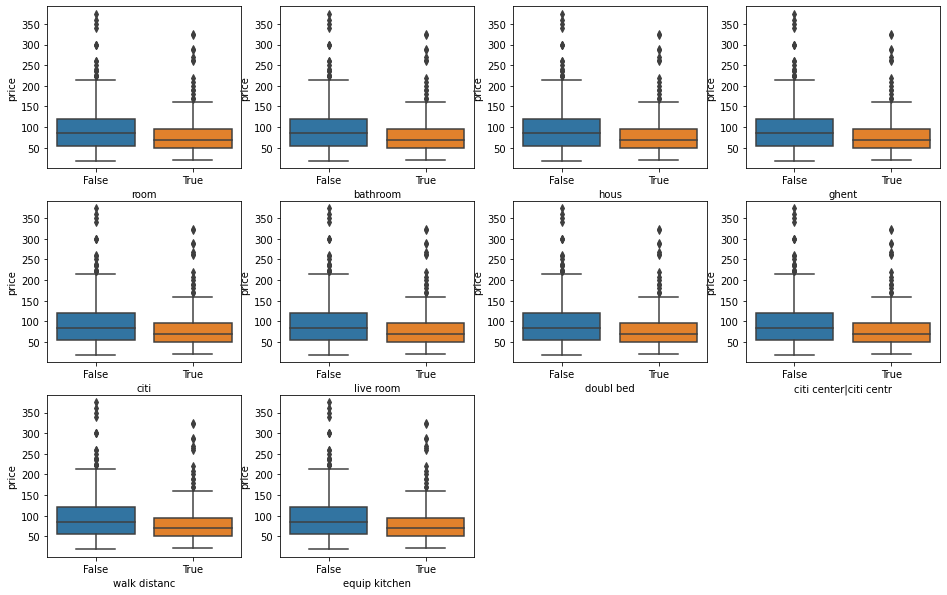

In [54]:
to_check = ["room", "bathroom", "hous", "ghent", "citi", "live room", "doubl bed", "citi center|citi centr", "walk distanc", "equip kitchen"]

data_city_center = data_en

plt.figure(figsize=(16,28))
for i, feature in enumerate(to_check):
    data_city_center[feature] = data_en['description'].str.contains('citi center|citi centr')
    plt.subplot(8, 4, 1+i)
    sns.boxplot(x=feature, y='price', data=data_city_center)



The resulting boxplots give us a counterintuitive result. We see a boxplot that is positioned higher on the price scale if the words aren't used in the description. This could be due to the fact that there are more listings that don't use those exact words. That's why we tried to look for descriptions that use one or more of these words, the boxplot below shows that. We see that the price of the listings that don't use any of these words is significantly lower. We do however have to take this with a grain of salt, as there are only 17 listings that don't use any of these words.

17

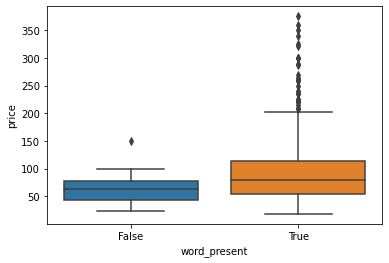

In [60]:
data_city_center = data_en
data_city_center["word_present"] = data_en['description'].str.contains("room|bathroom|hous|ghent|citi|live room|doubl bed|citi center|citi centr|walk distanc|equip kitchen")
sns.boxplot(x="word_present", y='price', data=data_city_center)
data_city_center[data_city_center["word_present"] == False].shape[0]

We decided to look into the amenities of a listing as well. We started with the tfidf countvectorizing once again.

In [102]:
count_words(data_cleaned, language=english, words=(1,2), column='amenities', length=40)

C:\Users\bavop\AppData\Roaming\Python\Python38\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,tfidf
alarm,0.208666
allowed,0.186701
wifi,0.171257
dryer,0.169884
essentials,0.148949
heating,0.146547
hot,0.141570
water,0.139339
hot water,0.139168
smoke alarm,0.138653


We wrote a simple function to make a boxplot.

In [158]:
def create_boxplot(feature, name='feature'):
    data_copy = data_cleaned[['amenities', 'price']]
    data_copy[name] = data_copy['amenities']
    data_copy[name] = data_copy['amenities'].str.contains(feature, case=False)
    print(feature, ": ", 'False: ', data_copy[data_copy[name] == False].shape[0], ', True: ', data_copy[data_copy[name] == True].shape[0])
    sns.boxplot(x=name, y='price', data=data_copy)

We took some amenities that we thought were worth looking into, based on the tfidf above.

TV :  False:  342 , True:  556
hair dryer :  False:  211 , True:  687
parking :  False:  283 , True:  615
wifi|wi-fi :  False:  8 , True:  890
kitchen :  False:  150 , True:  748
alarm :  False:  86 , True:  812
dedicated workspace :  False:  259 , True:  639
refrigerator :  False:  310 , True:  588
dishes :  False:  271 , True:  627


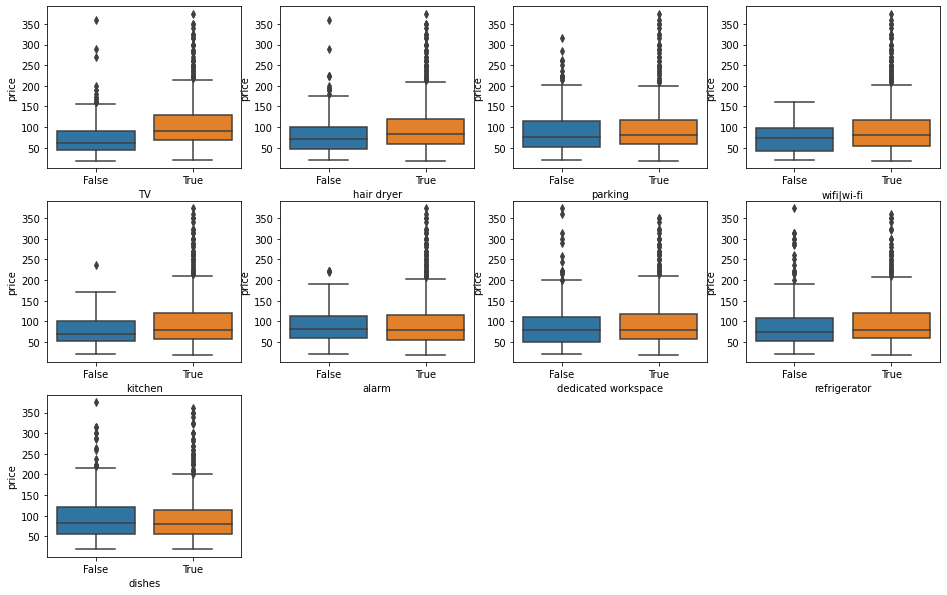

In [159]:
to_check = ["TV", "hair dryer", "parking", "wifi|wi-fi", "kitchen", "alarm", "dedicated workspace", "refrigerator", "dishes"]

plt.figure(figsize=(16,28))
for i, feature in enumerate(to_check):
    plt.subplot(8, 4, 1+i)
    create_boxplot(feature, feature)

We see that some amenities actually have an impact on the price, the biggest examples being a TV and Wi-Fi. Others like dishes or an alarm have less of an impact.